Write code for generating polynomial interpolants by inverting the Vandermonde matrix (don’t use libraries or built-in functions except for linear algebra). You will use both equispaced points on [−1, 1] and Chebyshev extrema on [−1, 1]. Look up the formula for the latter. You will be interpolating the Runge function f (x) = 1/(1+25x^2), assuming samples of the function are provided at your node set. Generate the following:
(a) A plot of condition number of the Vandermonde matrix vs number of nodes for both types of points.
(b) A plot of the polynomial interpolants for N = 9 and N = 50 for both types of points.
(c) Evaluate the Chebyshev extrema interpolant at 10, 000 equispaced nodes. Produce a plot of total time vs the accuracy (measured as the ℓ2 relative error in the polynomial interpolant) only for Chebyshev extrema.

In [9]:
import numpy as np


def vandermonde_matrix(degree, coefficients):
    '''
    Generate the vandermonde matrix manually using the coefficients and degree.
    Would be better to use numpy.vander, but this is a good exercise.
    
    Parameters
    ----------
    degree : int
        The degree of the polynomial.
        
    coefficients : numpy.ndarray
        The coefficients of the polynomial.
    '''
    # Initialize the matrix
    vandermonde = np.zeros((len(coefficients), degree+1))
    # Fill the matrix
    for i in range(len(coefficients)):
        for j in range(degree+1):
            vandermonde[i, j] = coefficients[i]**j

    return vandermonde


def guassian_elimination(A, y):
    '''
    Perform gaussian elemination on a matrix A.
    This function assumes that the matrix is square and invertible.
    It is also assumed that y is a column vector containing the same number of
    rows as A.

    Parameters
    ----------
    A : numpy.ndarray
        The matrix to be solved.
    y : numpy.ndarray
        The solution vector.

    Returns
    -------
    xinv : numpy.ndarray
        The solution vector.
    '''

    n_rows, n_cols = np.shape(A)  # get the shape of the matrix

    assert n_rows == n_cols, "Matrix must be square"
    assert np.shape(y) == (
        n_rows, 1), "Solution vector must be a column vector with the same number of rows as the matrix A"

    # Create a column vector to store the solution
    xinv = np.zeros((n_cols, 1))
    # Get the matrix in upper triangular form
    for pivot_row in range(n_rows - 1):
        # Get the pivot element
        pivot_element = A[pivot_row, pivot_row]
        # For every row below the pivot row
        for row in range(pivot_row + 1, n_rows):
            zero_element = A[row, pivot_row]  # Get the element to be zeroed
            ratio = zero_element/pivot_element  # Get the ratio to multiply the pivot row by
            A[row, pivot_row:] = A[row, pivot_row:] - ratio*A[pivot_row,
                                                              pivot_row:]  # Zero the element

    # Get the matrix in reduced row echelon form

    # the last row is already in reduced row echelon form
    xinv[n_cols - 1, 0] = y[n_cols - 1, 0]/A[n_rows - 1, n_cols - 1]

    # For every row above the last row
    for row in range(n_rows - 2, -1, -1):
        # Get the sum of the products of the coefficients and the solution
        sum = 0
        for col in range(row + 1, n_cols):
            # This works because unsolved elements are zero
            sum += A[row, col]*xinv[col, 0]
        # Get the solution
        xinv[row, 0] = (y[row, 0] - sum)/A[row, row]

    return xinv

# runge function to interpolate


def runge(x):
    return 1/(1+25*x**2)




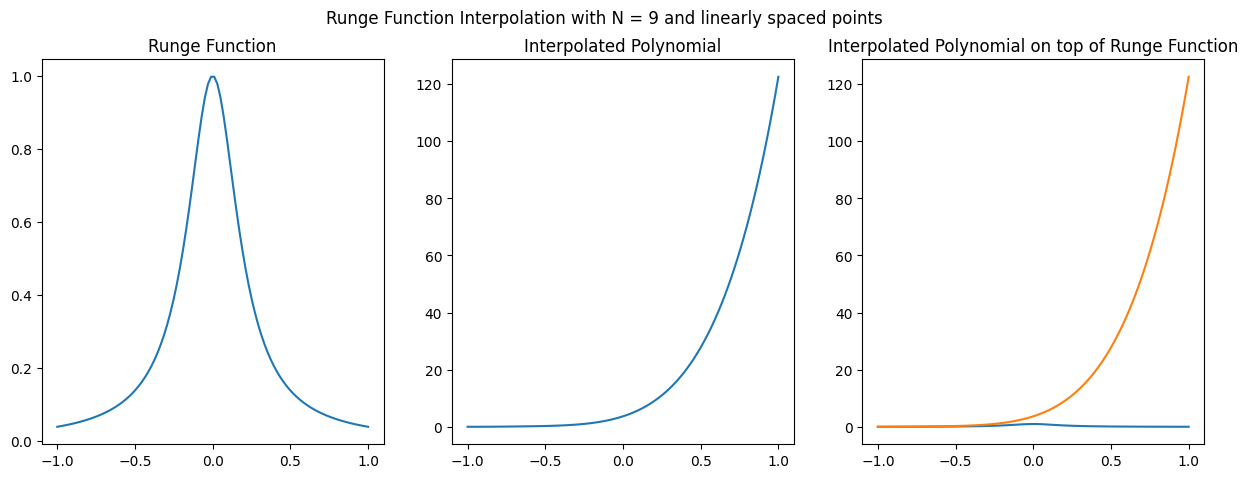

In [10]:
N = 9
# Generate the coefficients using linearly spaced points
x = np.linspace(-1, 1, N)

# Generate the solution vector
y = np.zeros((N, 1))
for i in range(N):
    y[i, 0] = runge(x[i])

# Generate the vandermonde matrix
A = vandermonde_matrix(N - 1, x)

# Solve the system
coefficients = guassian_elimination(A, y)

# Plot the results for comparison
import matplotlib.pyplot as plt

plt_x = np.linspace(-1, 1, 100) # plot points
plt_y = np.zeros((100, 1))
for i in range(100):
    plt_y[i, 0] = runge(plt_x[i])



def polynomial(x, coefficients):
    '''
    Evaluate a polynomial at a point x given the coefficients of the polynomial.
    '''
    y = 0
    for i in range(len(coefficients)):
        y += coefficients[i, 0]*x**i
    return y

fig, axes = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle(f'Runge Function Interpolation with N = {N} and linearly spaced points')
axes[0].set_title('Runge Function')
axes[0].plot(plt_x, plt_y, label='Runge Function')
axes[1].set_title('Interpolated Polynomial')
axes[1].plot(plt_x, polynomial(plt_x, coefficients), label='Interpolated Polynomial')
axes[2].set_title('Interpolated Polynomial on top of Runge Function')
axes[2].plot(plt_x, plt_y, label='Runge Function')
axes[2].plot(plt_x, polynomial(plt_x, coefficients), label='Interpolated Polynomial')




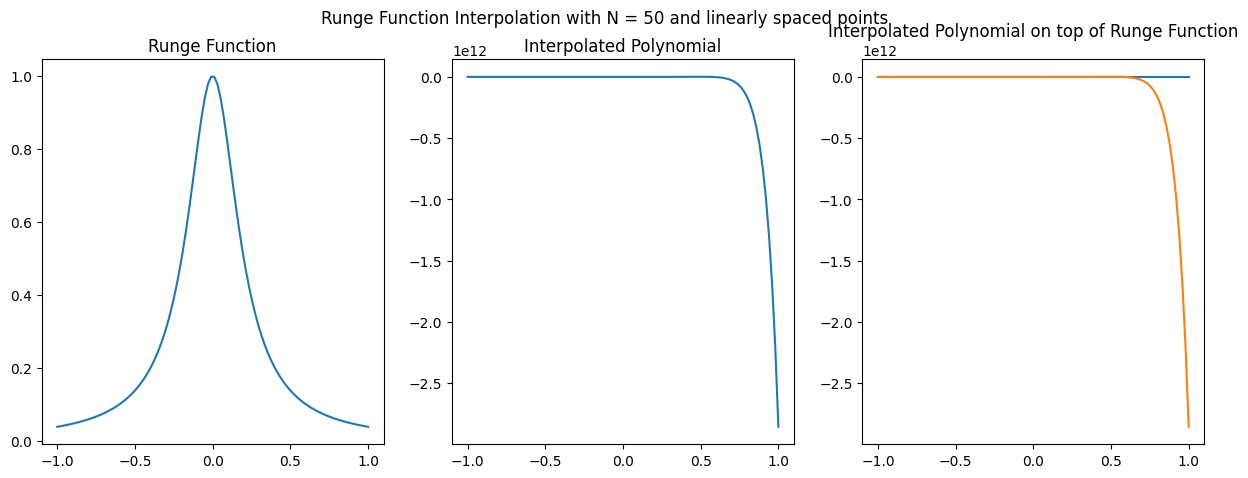

In [11]:
N = 50
# Generate the coefficients using linearly spaced points
x = np.linspace(-1, 1, N)

# Generate the solution vector
y = np.zeros((N, 1))
for i in range(N):
    y[i, 0] = runge(x[i])

# Generate the vandermonde matrix
A = vandermonde_matrix(N - 1, x)

# Solve the system
coefficients = guassian_elimination(A, y)

# Plot the results for comparison
import matplotlib.pyplot as plt

plt_x = np.linspace(-1, 1, 100) # plot points
plt_y = np.zeros((100, 1))
for i in range(100):
    plt_y[i, 0] = runge(plt_x[i])



def polynomial(x, coefficients):
    '''
    Evaluate a polynomial at a point x given the coefficients of the polynomial.
    '''
    y = 0
    for i in range(len(coefficients)):
        y += coefficients[i, 0]*x**i
    return y

fig, axes = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle(f'Runge Function Interpolation with N = {N} and linearly spaced points')
axes[0].set_title('Runge Function')
axes[0].plot(plt_x, plt_y, label='Runge Function')
axes[1].set_title('Interpolated Polynomial')
axes[1].plot(plt_x, polynomial(plt_x, coefficients), label='Interpolated Polynomial')
axes[2].set_title('Interpolated Polynomial on top of Runge Function')
axes[2].plot(plt_x, plt_y, label='Runge Function')
axes[2].plot(plt_x, polynomial(plt_x, coefficients), label='Interpolated Polynomial')




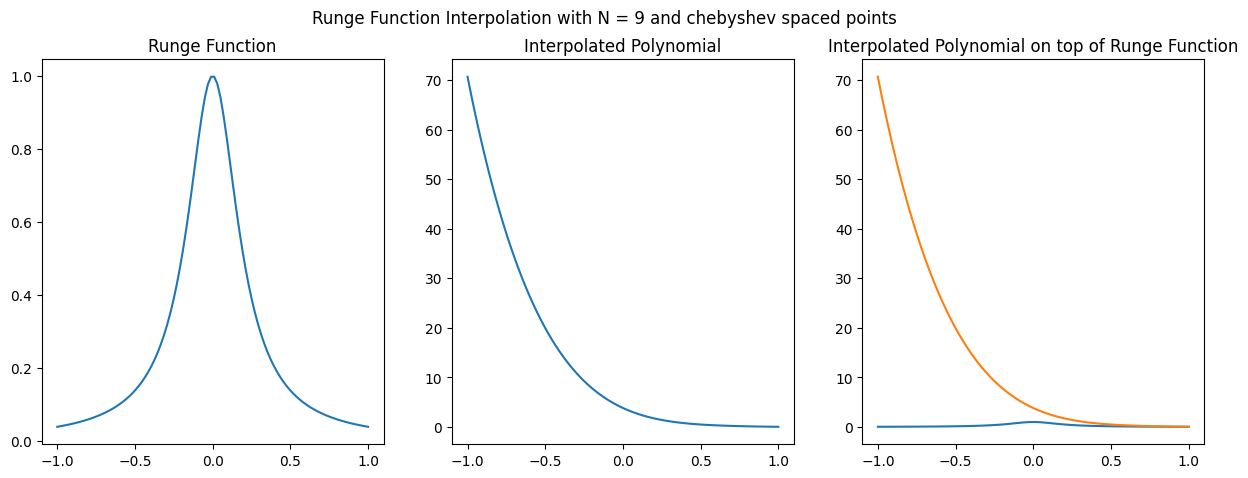

In [12]:
N = 9

# Generate the coefficients using chebyshev spaced points
x = np.zeros((N, 1))
for i in range(N):
    x[i, 0] = np.cos(np.pi*(2*i + 1)/(2*N))
    
# Generate the solution vector
y = np.zeros((N, 1))
for i in range(N):
    y[i, 0] = runge(x[i])

# Generate the vandermonde matrix
A = vandermonde_matrix(N - 1, x)

# Solve the system
coefficients = guassian_elimination(A, y)

# Plot the results for comparison
import matplotlib.pyplot as plt

plt.subplots(1, 3, figsize=(15, 5))
plt.suptitle(f'Runge Function Interpolation with N = {N} and chebyshev spaced points')
plt.subplot(1, 3, 1)
plt.title('Runge Function')
plt.plot(plt_x, plt_y, label='Runge Function')
plt.subplot(1, 3, 2)
plt.title('Interpolated Polynomial')
plt.plot(plt_x, polynomial(plt_x, coefficients), label='Interpolated Polynomial')
plt.subplot(1, 3, 3)
plt.title('Interpolated Polynomial on top of Runge Function')
plt.plot(plt_x, plt_y, label='Runge Function')
plt.plot(plt_x, polynomial(plt_x, coefficients), label='Interpolated Polynomial')
    

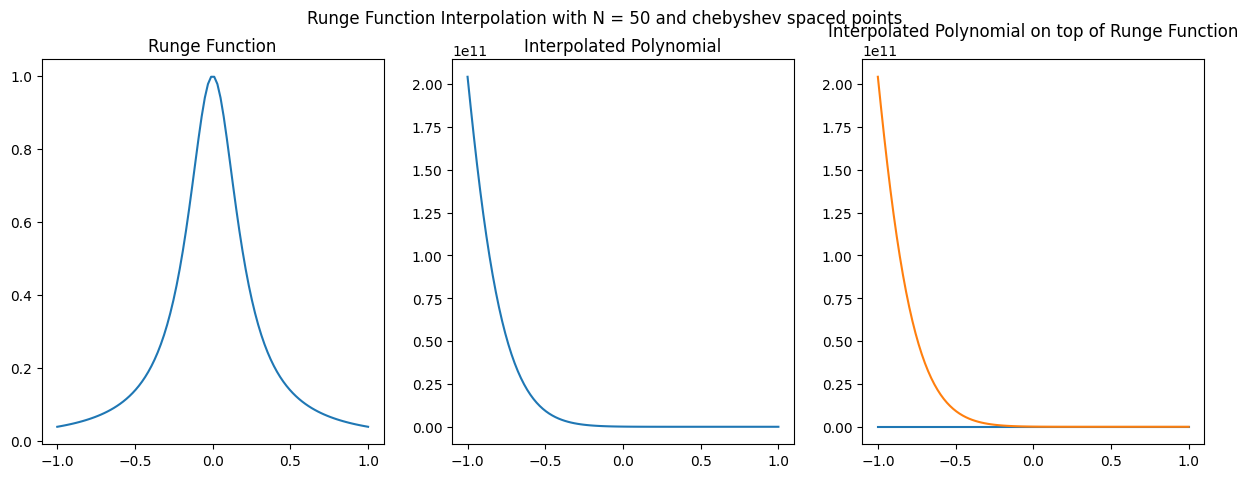

In [13]:
N = 50

# Generate the coefficients using chebyshev spaced points
x = np.zeros((N, 1))
for i in range(N):
    x[i, 0] = np.cos(np.pi*(2*i + 1)/(2*N))
    
# Generate the solution vector
y = np.zeros((N, 1))
for i in range(N):
    y[i, 0] = runge(x[i])

# Generate the vandermonde matrix
A = vandermonde_matrix(N - 1, x)

# Solve the system
coefficients = guassian_elimination(A, y)

# Plot the results for comparison
import matplotlib.pyplot as plt

plt.subplots(1, 3, figsize=(15, 5))
plt.suptitle(f'Runge Function Interpolation with N = {N} and chebyshev spaced points')
plt.subplot(1, 3, 1)
plt.title('Runge Function')
plt.plot(plt_x, plt_y, label='Runge Function')
plt.subplot(1, 3, 2)
plt.title('Interpolated Polynomial')
plt.plot(plt_x, polynomial(plt_x, coefficients), label='Interpolated Polynomial')
plt.subplot(1, 3, 3)
plt.title('Interpolated Polynomial on top of Runge Function')
plt.plot(plt_x, plt_y, label='Runge Function')
plt.plot(plt_x, polynomial(plt_x, coefficients), label='Interpolated Polynomial')

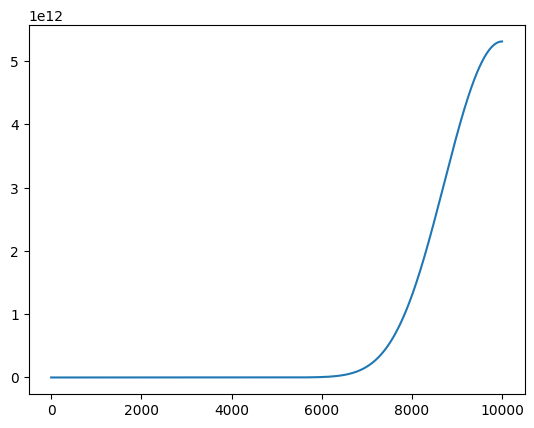

In [14]:
N = int(10e3)

def l2(x):
    '''
    Calculate the l2 norm of x.
    '''
    return np.sqrt(np.sum(x**2))
    

def error_fn(f, x, coefficients):
    '''
    Calculate the error of a polynomial approximation of a function f at points x.
    '''
    err = np.zeros((len(x), 1))
    for i in range(len(x)):
        err[i, 0] = l2(f(x[i]) - polynomial(x[i], coefficients)) / l2(f(x[i]))
    return err

extrema = np.zeros((N, 1))

# generate the chebychev extremas
for i in range(N):
    extrema[i, 0] = np.cos(np.pi*(2*i + 1)/(2*N))
    
# calculate the error
error = error_fn(runge, extrema, coefficients)

# plot the error
plt.plot(error)


    
